<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/ProfCientistaDados_m36_supportmaterial_exercise01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista.

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_pickle('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Modelagem de Dados Categorizados/Descritiva IV - Visualização de dados categorizados/base_nfp.pkl')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [97]:
df_jan = df[df['Data Emissão'] >= '2020-01-01']
tab_p = pd.crosstab(df_jan.categoria, df_jan.flag_credito, margins=True, margins_name='total')
tab_p

flag_credito,0,1,total
categoria,,,
Alimentos,1608,3442,5050
Auto posto,405,135,540
Construção,8524,7523,16047
Farmácia,6607,3582,10189
Mercado,14381,13177,27558
Restaurantes,553,1626,2179
Varejo,4365,701,5066
Vestuário,1477,443,1920
não definido,11718,6689,18407


In [98]:
rótulo_nao_retorno = tab_p.columns[0]
rótulo_retorno = tab_p.columns[1]
tab_p['pct_retorno'] = tab_p[rótulo_retorno] / tab_p['total']
tab_p

flag_credito,0,1,total,pct_retorno
categoria,,,,
Alimentos,1608,3442,5050,0.681584
Auto posto,405,135,540,0.250000
Construção,8524,7523,16047,0.468810
Farmácia,6607,3582,10189,0.351556
Mercado,14381,13177,27558,0.478155
Restaurantes,553,1626,2179,0.746214
Varejo,4365,701,5066,0.138373
Vestuário,1477,443,1920,0.230729
não definido,11718,6689,18407,0.363394


<Axes: xlabel='categoria'>

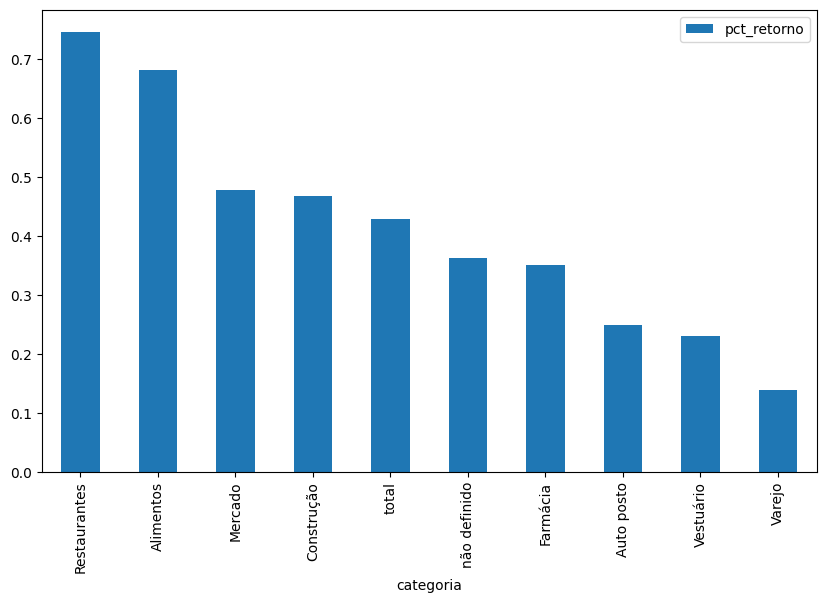

In [92]:
tab_p_sorted = tab_p.sort_values('pct_retorno', ascending=False)
tab_p_sorted.plot(kind='bar', stacked=True, y='pct_retorno', figsize=(10, 6))

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [99]:
tab['pct_evento'] = tab[rótulo_retorno] / tab.loc['total',rótulo_retorno]
tab['pct_nao_evento'] = tab[rótulo_nao_retorno] / tab.loc['total',rótulo_nao_retorno]
tab['woe'] = np.log(tab['pct_evento'] / tab['pct_nao_evento'])

tab[['pct_evento', 'pct_nao_evento', 'woe']]

flag_credito,pct_evento,pct_nao_evento,woe
categoria,,,
Restaurantes,0.043571,0.011141,1.363801
Alimentos,0.092234,0.032395,1.046342
Mercado,0.353100,0.289718,0.197846
Construção,0.201592,0.171723,0.160360
total,1.000000,1.000000,0.000000
não definido,0.179243,0.236069,-0.275381
Farmácia,0.095986,0.133104,-0.326928
Auto posto,0.003618,0.008159,-0.813331
Vestuário,0.011871,0.029755,-0.918918


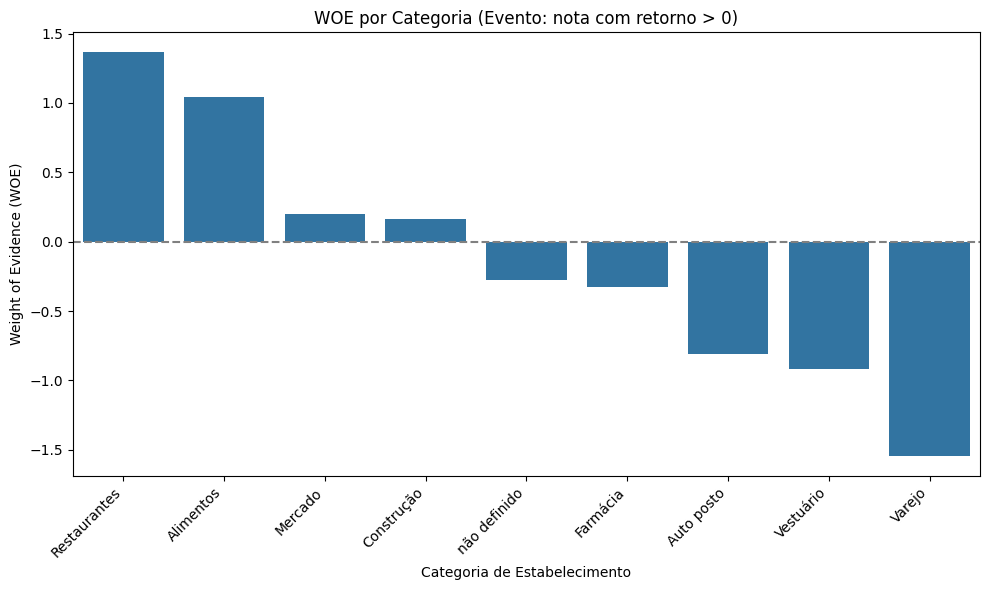

In [100]:
# grafico
tab_woe = tab.drop("total").reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=tab_woe, x="categoria", y="woe")
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Weight of Evidence (WOE)")
plt.xlabel("Categoria de Estabelecimento")
plt.title("WOE por Categoria (Evento: nota com retorno > 0)")
plt.tight_layout()
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [101]:
tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
print(tab.iv_parcial.sum())
tab

0.27882574285237305


flag_credito,0,1,total,pct_retorno,pct_evento,pct_nao_evento,woe,iv_parcial
categoria,,,,,,,,
Restaurantes,553,1626,2179,0.746214,0.043571,0.011141,1.363801,0.044229
Alimentos,1608,3442,5050,0.681584,0.092234,0.032395,1.046342,0.062613
Mercado,14381,13177,27558,0.478155,0.353100,0.289718,0.197846,0.012540
Construção,8524,7523,16047,0.468810,0.201592,0.171723,0.160360,0.004790
total,49638,37318,86956,0.429160,1.000000,1.000000,0.000000,0.000000
não definido,11718,6689,18407,0.363394,0.179243,0.236069,-0.275381,0.015649
Farmácia,6607,3582,10189,0.351556,0.095986,0.133104,-0.326928,0.012135
Auto posto,405,135,540,0.250000,0.003618,0.008159,-0.813331,0.003694
Vestuário,1477,443,1920,0.230729,0.011871,0.029755,-0.918918,0.016434


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


### 🔍 Conclusões da Análise do WOE e IV (Evento: Nota com Retorno > 0)

- A variável **“categoria”** mostra-se relevante para diferenciar notas com ou sem retorno, com um **IV total de aproximadamente 0.279** — o que indica **poder preditivo médio**.

- As categorias com **maior propensão** a gerar retorno são:
  - **Restaurantes** (WOE = 1.36 | IV parcial = 0.044)
  - **Alimentos** (WOE = 1.05 | IV parcial = 0.066)
  - Ambas são fortemente associadas a um comportamento positivo de retorno.

- As categorias com **menor propensão** (mais negativas) são:
  - **Varejo** (WOE = -1.54 | IV parcial = 0.107)
  - **Vestuário** (WOE = -0.91 | IV parcial = 0.016)
  - **Auto Posto** e **Farmácia** também aparecem com WOE negativo.

- **Mercado** e **Construção** apresentam WOE levemente positivo, indicando que sua propensão ao retorno é próxima da média, com contribuição moderada ao IV.

- A categoria **“não definido”** possui comportamento ambíguo (WOE negativo e IV parcial relevante), reforçando a importância de melhorar a classificação dos dados.

---

**Recomendações:**
- Em modelos preditivos, a variável “categoria” deve ser considerada, especialmente com encoding por WOE.
- Políticas de incentivo podem ser mais eficazes se priorizarem **Restaurantes** e **Alimentos**, e repensadas para segmentos como **Varejo** e **Vestuário**.
